In [3]:
import os
import torch
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision.transforms.functional as TF
DEVICE = torch.device('cuda')


In [98]:
import os
print(os.getcwd())
impath = 'models/data/testmask.png'
img = Image.open(impath)
x = TF.to_tensor(img)
x = x.squeeze(0)
print(x.shape)

/home/sean/Documents/scripts/segs
torch.Size([3, 874, 1164])


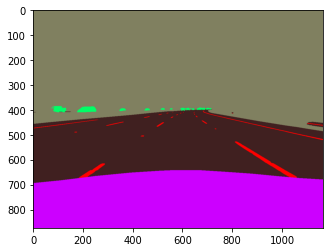

In [99]:
ig = plt.imshow(x.permute(1,2,0).detach().cpu().numpy())
plt.show(ig)

In [8]:
x.shape

torch.Size([3, 874, 1164])

In [10]:
t = x *255

In [11]:
t

tensor([[[128., 128., 128.,  ..., 128., 128., 128.],
         [128., 128., 128.,  ..., 128., 128., 128.],
         [128., 128., 128.,  ..., 128., 128., 128.],
         ...,
         [204., 204., 204.,  ..., 204., 204., 204.],
         [204., 204., 204.,  ..., 204., 204., 204.],
         [204., 204., 204.,  ..., 204., 204., 204.]],

        [[128., 128., 128.,  ..., 128., 128., 128.],
         [128., 128., 128.,  ..., 128., 128., 128.],
         [128., 128., 128.,  ..., 128., 128., 128.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

        [[ 96.,  96.,  96.,  ...,  96.,  96.,  96.],
         [ 96.,  96.,  96.,  ...,  96.,  96.,  96.],
         [ 96.,  96.,  96.,  ...,  96.,  96.,  96.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]]]

In [12]:
pred = torch.argmax(t, dim = 0)

In [23]:
t[:,:,0].shape

torch.Size([3, 874])

In [88]:
road = torch.tensor([64,32,32]).unsqueeze(0)
lane = torch.tensor([255,0,0]).unsqueeze(0)
undrive = torch.tensor([128,128,96]).unsqueeze(0)
moveable = torch.tensor([0,255,102]).unsqueeze(0)
mycar = torch.tensor([204,0,255]).unsqueeze(0)

colourmap = torch.cat((road,lane,undrive,moveable,mycar), dim =0)
print(colourmap.shape)
print(colourmap)

torch.Size([5, 3])
tensor([[ 64,  32,  32],
        [255,   0,   0],
        [128, 128,  96],
        [  0, 255, 102],
        [204,   0, 255]])


In [89]:
c = colourmap/255
print(c)

tensor([[0.2510, 0.1255, 0.1255],
        [1.0000, 0.0000, 0.0000],
        [0.5020, 0.5020, 0.3765],
        [0.0000, 1.0000, 0.4000],
        [0.8000, 0.0000, 1.0000]])


In [87]:
print(colourmap)

tensor([[ 64,  32,  32, 255,   0],
        [  0, 128, 128,  96,   0],
        [255, 102, 204,   0, 255]])


In [46]:
c

tensor([[0.2510, 0.1255, 0.1255],
        [1.0000, 0.0000, 0.0000],
        [0.5020, 0.5020, 0.3765],
        [0.0000, 1.0000, 0.4000],
        [0.8000, 0.0000, 1.0000]])

In [61]:
c = c.reshape(3,5)

In [49]:
x.shape

torch.Size([3, 874, 1164])

In [66]:
x[:,:,0][:,0].shape

torch.Size([3])

In [79]:
torch.where(x == r)

RuntimeError: The size of tensor a (1164) must match the size of tensor b (3) at non-singleton dimension 2

In [68]:
x.shape

torch.Size([3, 874, 1164])

In [71]:
road.shape

torch.Size([3, 1])

In [73]:
r = road.squeeze(1)

In [91]:
r = c[0]
r

tensor([0.2510, 0.1255, 0.1255])

In [83]:
c.shape

torch.Size([3, 5])

torch.Size([3, 874, 1164])

In [134]:
colors = torch.unique(x)
print(colors)

tensor([0.0000, 0.1255, 0.2510, 0.3765, 0.4000, 0.5020, 0.8000, 1.0000])


In [109]:
x.shape

torch.Size([1, 3, 874, 1164])

In [130]:
c

tensor([[0.2510, 0.1255, 0.1255],
        [1.0000, 0.0000, 0.0000],
        [0.5020, 0.5020, 0.3765],
        [0.0000, 1.0000, 0.4000],
        [0.8000, 0.0000, 1.0000]])

In [114]:
r = c[0]

In [132]:
x

tensor([[[0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         ...,
         [0.8000, 0.8000, 0.8000,  ..., 0.8000, 0.8000, 0.8000],
         [0.8000, 0.8000, 0.8000,  ..., 0.8000, 0.8000, 0.8000],
         [0.8000, 0.8000, 0.8000,  ..., 0.8000, 0.8000, 0.8000]],

        [[0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.3765, 0.3765, 0.3765,  ..., 0.3765, 0.3765, 0.3765],
         [0.3765, 0.3765, 0.3765,  ..., 0.3765, 0.3765, 0.3765],
         [0.3765, 0.3765, 0.3765,  ..., 0.3765, 0.3765, 0.

In [129]:
x[:,0:,0][].shape

torch.Size([874])

In [135]:
r

tensor([0.2510, 0.1255, 0.1255])

In [136]:
x.shape

torch.Size([3, 874, 1164])

In [142]:
q = torch.zeros(x.shape[1:])
m = (x[0] == r[0]) & (x[1] == r[1]) & (x[2] == r[2])


In [143]:
print(q.shape, m.shape)

torch.Size([874, 1164]) torch.Size([874, 1164])


In [144]:
q[m] =1

In [145]:
q


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

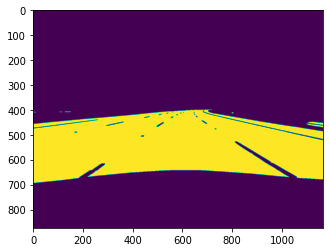

In [146]:
plt.imshow(q)
plt.show()

In [150]:
rtr = torch.unique(x, dim = 0)

In [152]:
rtr.shape

torch.Size([3, 874, 1164])

In [154]:
x.shape

torch.Size([3, 874, 1164])

In [155]:
q = torch.zeros(x.shape[2:])

In [156]:
q.shape

torch.Size([1164])

In [157]:
c

tensor([[0.2510, 0.1255, 0.1255],
        [1.0000, 0.0000, 0.0000],
        [0.5020, 0.5020, 0.3765],
        [0.0000, 1.0000, 0.4000],
        [0.8000, 0.0000, 1.0000]])

In [158]:
c[0]

tensor([0.2510, 0.1255, 0.1255])

In [159]:
from dataloader import *

In [14]:
impath = 'models/data/testmask.png'
img = Image.open(impath)
x = TF.to_tensor(img)
x = x.unsqueeze(0)

y = mask_encode(x, colourmap)
print(y.shape)

AssertionError: 

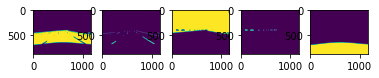

In [165]:
fig, axs = plt.subplots(1,5)
for ax, image in zip(axs.ravel(), y[0]):
    ax.imshow(image)

plt.show()


In [166]:
import albumentations as albu


In [167]:
x.shape

torch.Size([1, 3, 874, 1164])

In [168]:
def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(896, 1184)
    ]
    return albu.Compose(test_transform)

In [1]:
from dataloader import *

ModuleNotFoundError: No module named 'dataloader'

In [2]:
os.getcwd()

'/home/sean/Documents/scripts/segs'

In [3]:
from models.dataloader import *

/home/sean/Documents/scripts/segs


In [17]:
imgdir = 'comma10k/imgs'
maskdir = 'comma10k/masks'

# ENCODER = 'efficientnet-b3'
# ENCODER_WEIGHTS = 'imagenet'
# CLASSES = 16
# ACTIVATION = 'softmax'
# DEVICE = torch.device('cuda')

# preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

# preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)
train_dset = ImageDataset(imgdir, maskdir)#, augmentation=get_training_augmentation(), preprocessing=get_preprocessing(preprocessing_fn))
trainloader = DataLoader(train_dset, batch_size=4, shuffle=True, num_workers=12)

x = train_dset.__getitem__(0)

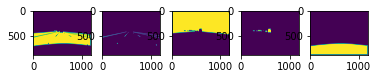

In [25]:
# import matplotlib.pyplot as plt
y = x[1]
fig, axs = plt.subplots(1,5)
for ax, image in zip(axs.ravel(), y):
    ax.imshow(image)

plt.show()

In [18]:
x.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [24]:
for image in y:
    print(image.shape)

torch.Size([896, 1184])
torch.Size([896, 1184])
torch.Size([896, 1184])
torch.Size([896, 1184])
torch.Size([896, 1184])


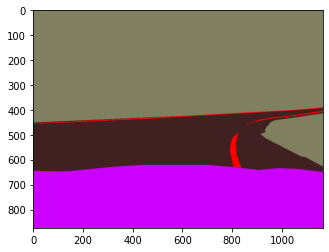

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
p = 'comma10k/masks/0687_a3c72848ebd486ca_2018-07-25--18-28-45_15_1198.png'
q = mpimg.imread(p)
plt.imshow(q)
plt.show()